In [1]:
# Libraries to scrape wikipedia
import requests
from bs4 import BeautifulSoup
import lxml
import unicodedata
import pandas as pd

# Load libraries
import json
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

#### Scrape wikipedia entry for Last Week Tonight episodes

In [16]:
# Open the URL and get the HTML content 
wiki_url = 'https://en.wikipedia.org/wiki/List_of_Last_Week_Tonight_with_John_Oliver_episodes'
page = requests.get(wiki_url)

# Parse the HTML from URL
# From docstirng --> recommended to name a specific parser
soup = BeautifulSoup(page.text, 'lxml')

# Find all tables in HTML
all_tables = soup.find_all("table")
print(f'# of Tables: {len(all_tables)}\n')

# Inspect 'class' element of each table
for table in all_tables:
    print(table['class'])

# of Tables: 9

['wikitable', 'plainrowheaders']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['wikitable', 'plainrowheaders', 'wikiepisodetable']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [112]:
# Filter to those tables that contain episode information
season_tables = [table for table in all_tables if 'wikiepisodetable' in table['class']]

# Iterate through seasons and compile episode information
episode_number, main_segment_title, air_date, viewers = [], [], [], []
for season in season_tables: 
    for row in season.findAll('tr'):
        cells = row.findAll('td')
        if len(cells) == 4:
            episode_number.append(cells[0].find(text=True))
            main_segment_title.append(cells[1].findAll(text=True))
            air_date.append(cells[2].find(text=True))
            viewers.append(cells[3].find(text=True))

# Correcting issues with compiled information
air_date = [unicodedata.normalize('NFKC', date) for date in air_date]
main_segment_title = [''.join(title).strip() for title in main_segment_title]

# Create list to track the episode's corresponding season number
season = []
season_number = 0
for episode in episode_number:
    if episode == '1':
        season_number += 1
    season.append(season_number)

In [152]:
# Convert individual field lists into DataFrame
lwt_episodes = pd.DataFrame([season, episode_number, main_segment_title, air_date, viewers])
lwt_episodes = lwt_episodes.transpose()
lwt_episodes.columns = ['season','episode','main_segment_title','air_date','viewers']
lwt_episodes['episode_overall'] = lwt_episodes.index + 1
lwt_episodes

,season,episode,main_segment_title,air_date,viewers,episode_overall
0,1,1,[POM Wonderful LLC v. Coca-Cola Co.],"April 27, 2014",1.11,1
1,1,2,[Capital punishment],"May 4, 2014",1.19,2
2,1,3,[Global warming controversy],"May 11, 2014",1.01,3
3,1,4,"[Right to be forgotten, (, Google Spain v AEP...","May 18, 2014",1.03,4
4,1,5,"[ , Net neutrality]","June 1, 2014",0.99,5
...,...,...,...,...,...,...
194,7,16,"[COVID-19 pandemic, in , prisons, and , jails]","June 21, 2020",TBD,195
195,7,17,[],"June 28, 2020",TBD,196
196,7,18,[],"July 19, 2020",TBD,197
197,7,19,[],"July 26, 2020",TBD,198


#### Load transcribed data

In [3]:
# Load text files
with open('asr/asrOutput.json') as f:
  data = json.load(f)

In [4]:
txt = data['results']['transcripts'][0]['transcript']
txt[:100]

'our main story tonight concerns the Corona virus. You know the thing you have to regularly convince '

#### Preprocess the data

In [16]:
# Convert to lower-case
text = txt.lower()

# Remove certain items
text = text.replace('. ',' ')
to_match = [",","'","\?","$","%"] 
text = re.sub(r'|'.join(to_match), '', text)

# Tokenize words
tokens = word_tokenize(text)
print(tokens[:8], end='\n')
print(f'Main Story Length: {len(tokens)}')

['our', 'main', 'story', 'tonight', 'concerns', 'the', 'corona', 'virus']
Main Story Length: 3330


In [84]:
# Number of sentences that contain a number
[n for n in tokens if n.isnumeric()]

['68000',
 '73',
 '10',
 '1999',
 '2016',
 '55',
 '280',
 '300',
 '95',
 '117',
 '2008',
 '23',
 '10',
 '80',
 '19',
 '19',
 '2009',
 '445000',
 '9000',
 '200000',
 '200000',
 '15',
 '1000',
 '3000',
 '3',
 '5',
 '5000',
 '600']

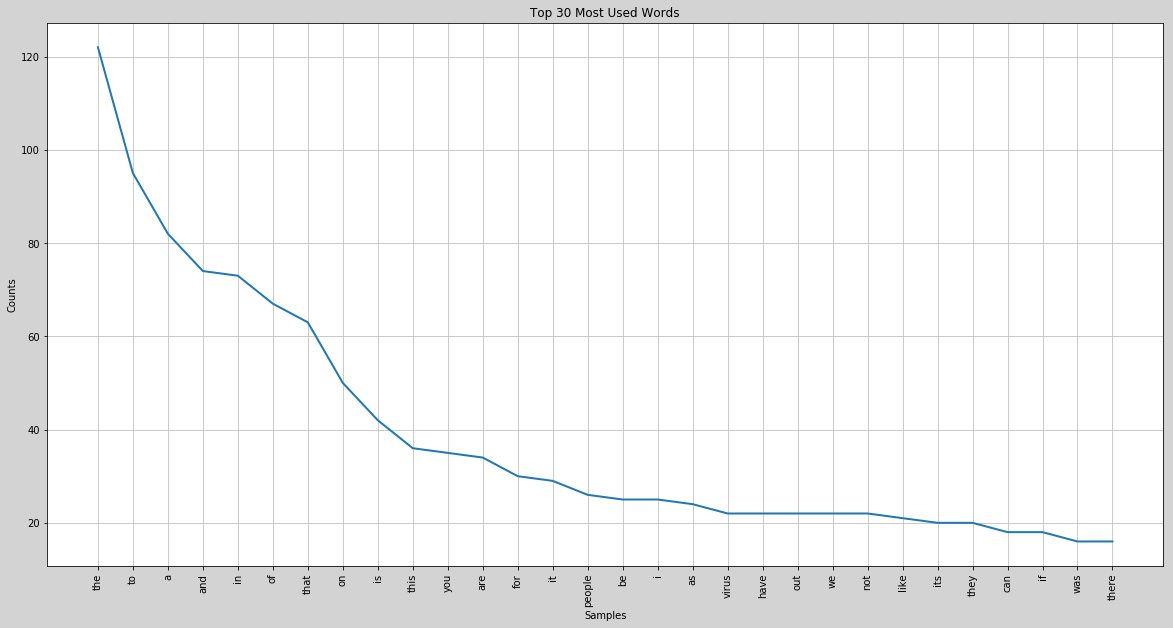

In [77]:
# https://online.rapidresizer.com/photograph-to-pattern.php
# Plot the most used words before removing stopwords
fig = plt.figure(figsize=(20,10), facecolor='lightgrey')
fd = nltk.FreqDist(tokens)
plt.title('Top 30 Most Used Words')
plt.xlabel('Word')
plt.ylabel('Count')
fd.plot(30,cumulative=False)

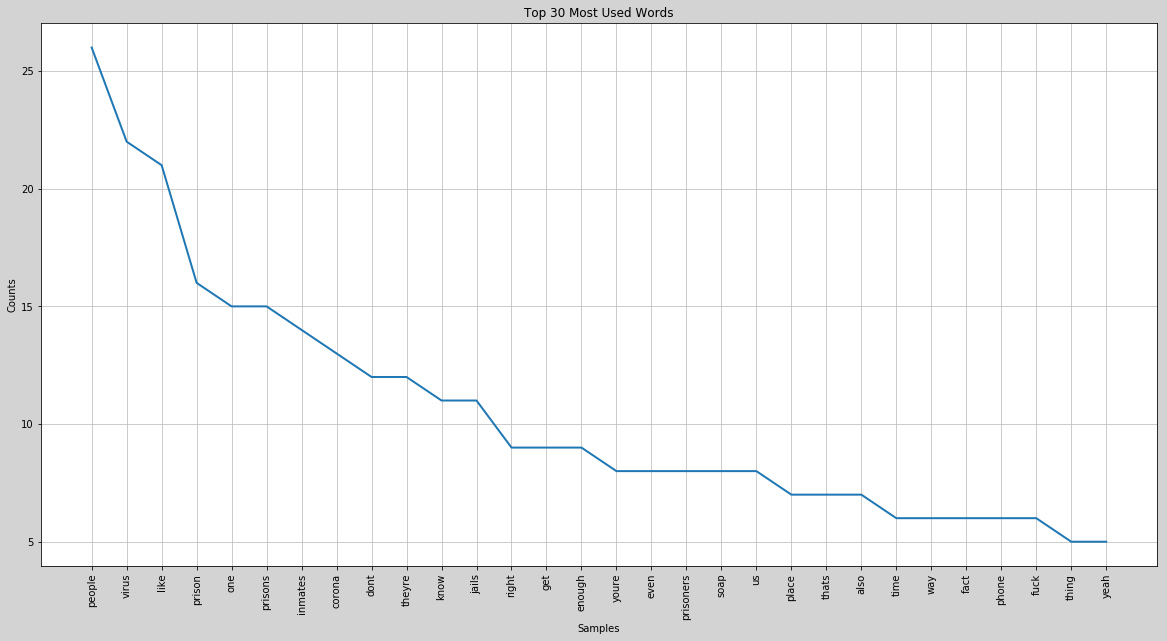

In [78]:
# Plot the most used words after removing stopwords
stop_words = set(stopwords.words('english'))
tokens = [i for i in tokens if not i in stop_words]

# Plot
fig = plt.figure(figsize=(20,10), facecolor='lightgrey')
fd = nltk.FreqDist(tokens)
plt.title('Top 30 Most Used Words')
plt.xlabel('Word')
plt.ylabel('Count')
fd.plot(30,cumulative=False)


#### Create a masked world cloud of John Oliver

In [ ]:
# Remove background color
# https://burner.bonanza.com/background_burns/42420682/load?panel=replace_background
# Change background color (black/transparent) to white
# https://www5.lunapic.com/editor/


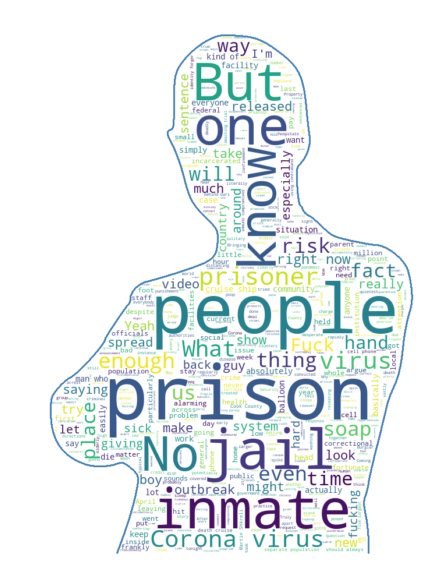

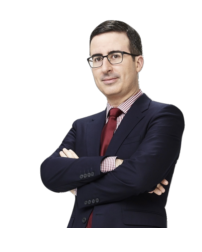

In [33]:
# Read the mask image
john_oliver = np.array(Image.open('jo_white_background.png'))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=500, mask=john_oliver,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(txt)

# store to file
wc.to_file("john_oliver.png")

# show
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(john_oliver, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1440x720 with 0 Axes>

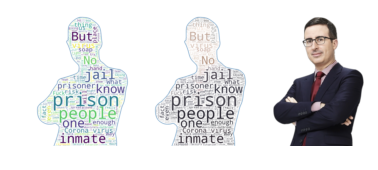

In [32]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "jo_white_background.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(txt)

# store to file
wc.to_file(path.join(d, "alice.png"))

# create coloring from image
image_colors = ImageColorGenerator(alice_mask)

# show
plt.figure(figsize=(20,10))
fig, axes = plt.subplots(1, 3, )
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

### Count the cuss words used

In [26]:
# Load the cuss word reference file
with open('reference/cuss_words.txt') as f:
    cuss_words = f.read().strip().split('\n')
    
sorted(cuss_words)[:5]

['anus', 'ass', 'bastard', 'bitch', 'blowjob']

In [36]:
# Count the number of cuss words used
word_found = []
for word in tokens:
    for cuss in cuss_words:
        if re.search(cuss, word):
            word_found.append(word)
print(len(word_found))

# Sentences with cuss words
sentences = sent_tokenize(txt)
sent_found = []
for sentence in sentences:
    for cuss in cuss_words:
        if re.search(cuss, sentence):
            sent_found.append(sentence)
print(len(set(sent_found)))
set(sent_found)

15
11


{'And generally, yeah, fuck that guy.',
 "But in this instance, despite the fact that Martin Shkreli is an attention starved tree frog who clearly wasn't held enough is a tadpole Andi, despite his reasoning for why he should be released Being complete bullshit.",
 'Everybody in this bitch down there was like, What the fuck you want me to do?',
 'If it takes the destruction of property for a system to pay attention to human lives, then we are in a dark fucking place, and I know that if you are fortunate enough, tough little to no familiarity with the prison system, it can be easy to ignore.',
 'No, I have it because those dear new had a fucking party back.',
 'No, it was treated as an emergency because there was a chance he was gonna fucking die.',
 'Or the man who was forced to return $3000 in prize money for cheating in bass fishing contest.',
 "Thankfully, of course, there turned out to be zero boys in that balloon, as it was later revealed to be a hoax pulled off by the boy's parent

In [37]:
word_found

['fucking',
 'hell',
 'fucking',
 'fucking',
 'fucking',
 'shit',
 'bass',
 'fuck',
 'fuck',
 'bullshit',
 'fuck',
 'fuck',
 'bitch',
 'fuck',
 'fuck']